# Media Company Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
media = pd.read_csv('../input/media-company/mediacompany.csv')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


# Exploratory Data Analysis

In [3]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [4]:
media.shape

(80, 8)

In [5]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


In [6]:
media.isnull().sum()

Date                    0
Views_show              0
Visitors                0
Views_platform          0
Ad_impression           0
Cricket_match_india     0
Character_A             0
Unnamed: 7             80
dtype: int64

In [7]:
##check duplicate values
media_dup=media.duplicated().any()
media_dup

False

In [8]:
##target variable
media.Views_show.value_counts()

183738    1
193763    1
162815    1
164043    1
208445    1
         ..
650563    1
236106    1
206830    1
200993    1
108961    1
Name: Views_show, Length: 80, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Views_show', ylabel='count'>

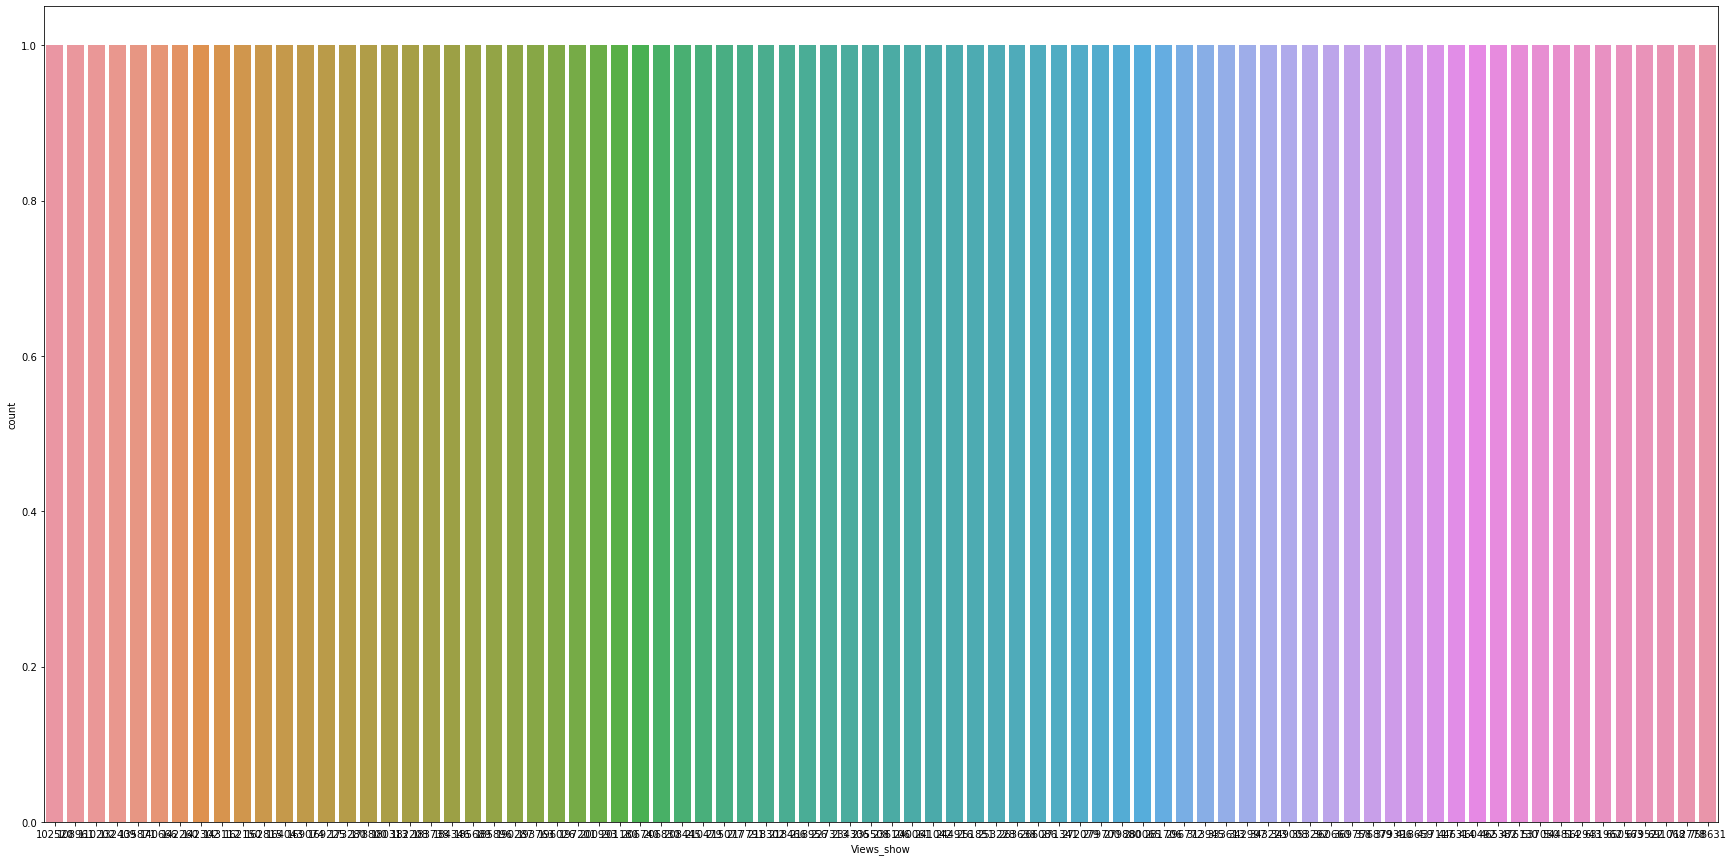

In [9]:
plt.figure(figsize=(30,15))
sns.countplot(media['Views_show'])

Categorical variables

In [10]:
media_categorical=media.loc[:,media.dtypes== object]
media_categorical

,Date
0,3/1/2017
1,3/2/2017
2,3/3/2017
3,3/4/2017
4,3/5/2017
...,...
75,5/15/2017
76,5/16/2017
77,5/17/2017
78,5/18/2017


Numerical features

In [11]:
media_numerical = media.select_dtypes(exclude=[object])
media_numerical

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,183738,1260228,1706478,1060860448,0,0,NaN
1,193763,1270561,1690727,1031846645,0,0,NaN
2,210479,1248183,1726157,1010867575,0,0,NaN
3,240061,1492913,1855353,1079194579,1,0,NaN
4,446314,1594712,2041418,1357736987,0,0,NaN
...,...,...,...,...,...,...,...
75,313945,1808684,2226788,1398052759,1,0,NaN
76,185689,1814227,2199844,1311961223,1,0,NaN
77,142260,1755803,2225752,1248266254,1,0,NaN
78,135871,1749654,2302789,1284859759,1,0,NaN


Converting date to Pandas datetime format

In [12]:
media['Date'] = pd.to_datetime(media['Date'], dayfirst = False )
# Date is in the format YYYY-MM-DD

In [13]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN


Deriving Matrices

Let's derive day of week column from date

In [14]:
media['Day_of_week'] = media['Date'].dt.dayofweek

In [15]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN,6


# Visualizing categorical column with bar plot

<AxesSubplot:xlabel='Date', ylabel='Views_show'>

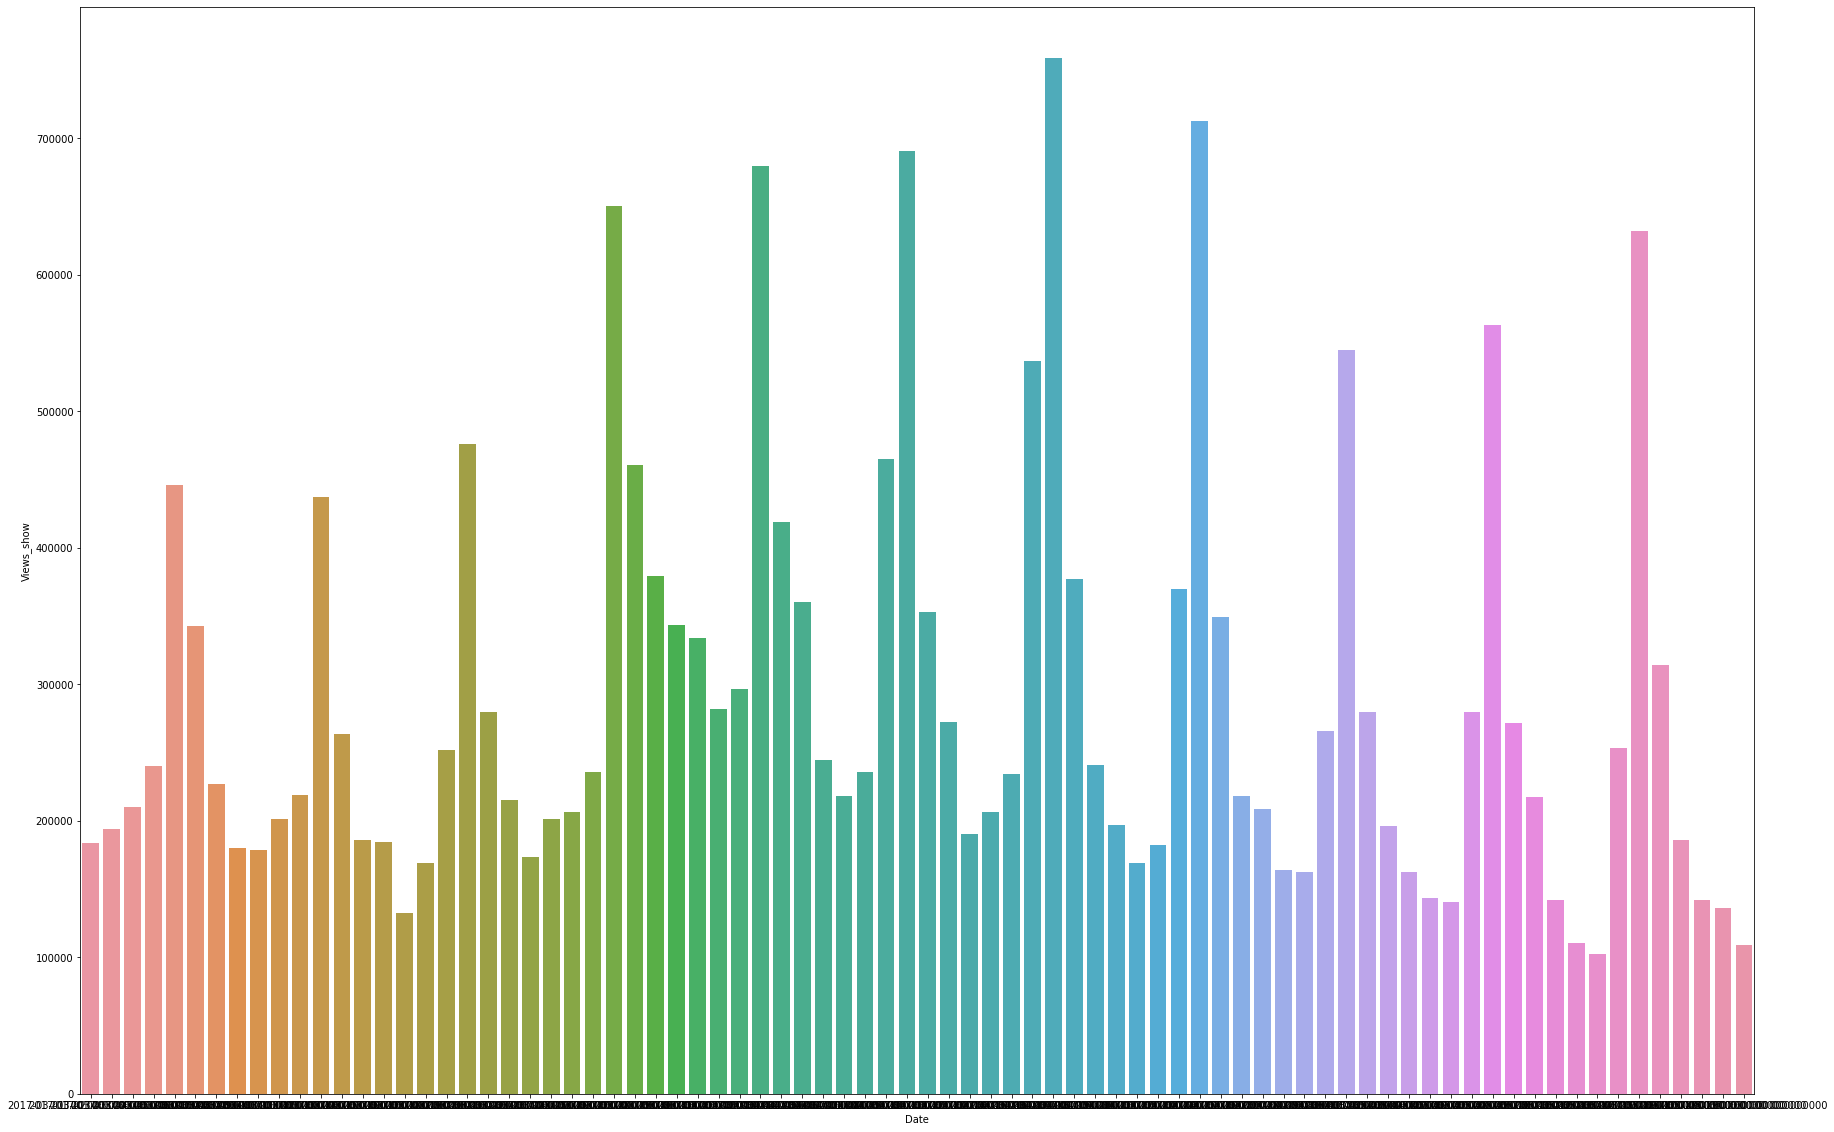

In [16]:
#Date
plt.figure(figsize=(30,20))
sns.barplot(data = media,x='Date', y='Views_show')

<AxesSubplot:xlabel='Day_of_week', ylabel='Views_show'>

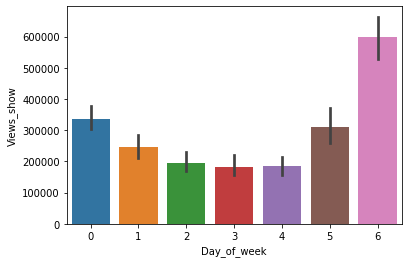

In [17]:
#Day of week
sns.barplot(data = media,x='Day_of_week', y='Views_show')

we can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days.

Hence we can think of another matrix "Weekend" that is 1 for weekends and 0 for weekdays.

In [18]:
di = {5:1, 6:1, 0:0, 1:0, 2:0, 3:0, 4:0}
media['weekend'] = media['Day_of_week'].map(di)

In [19]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN,6,1


<AxesSubplot:xlabel='weekend', ylabel='Views_show'>

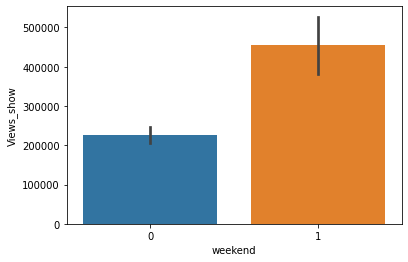

In [20]:
# Weekends
sns.barplot(data = media, x='weekend' , y='Views_show')

<AxesSubplot:xlabel='Date'>

<Figure size 1440x1440 with 0 Axes>

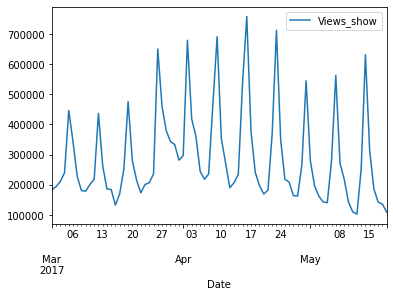

In [21]:
# days vs Views_show
plt.figure(figsize=(20,20))
media.plot.line(x='Date', y='Views_show')

# Affection of categorical features on charges

Text(0.5, 1.0, 'Date vs Views_show ')

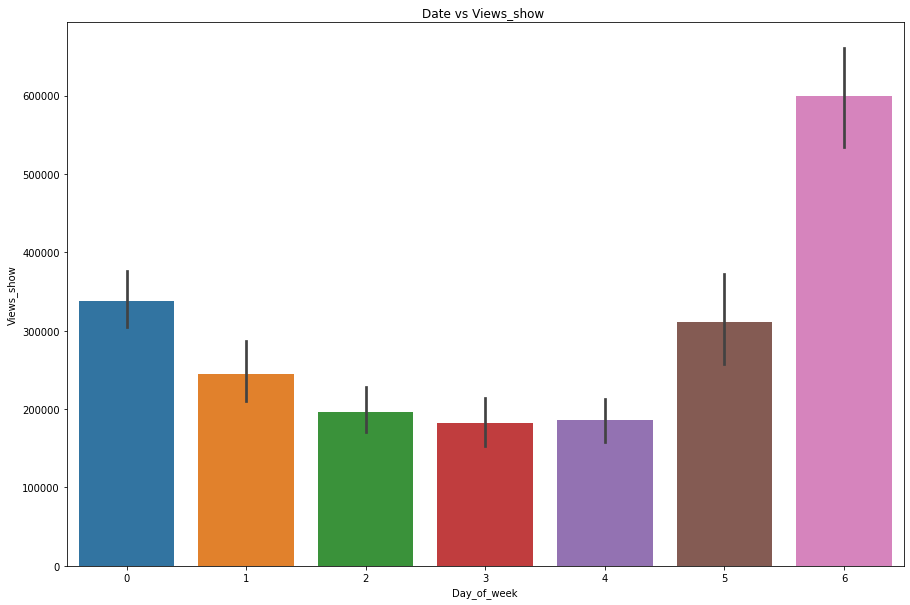

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x='Day_of_week', y='Views_show', data=media)
plt.title('Date vs Views_show ')

Text(0.5, 1.0, 'Date vs Views_show ')

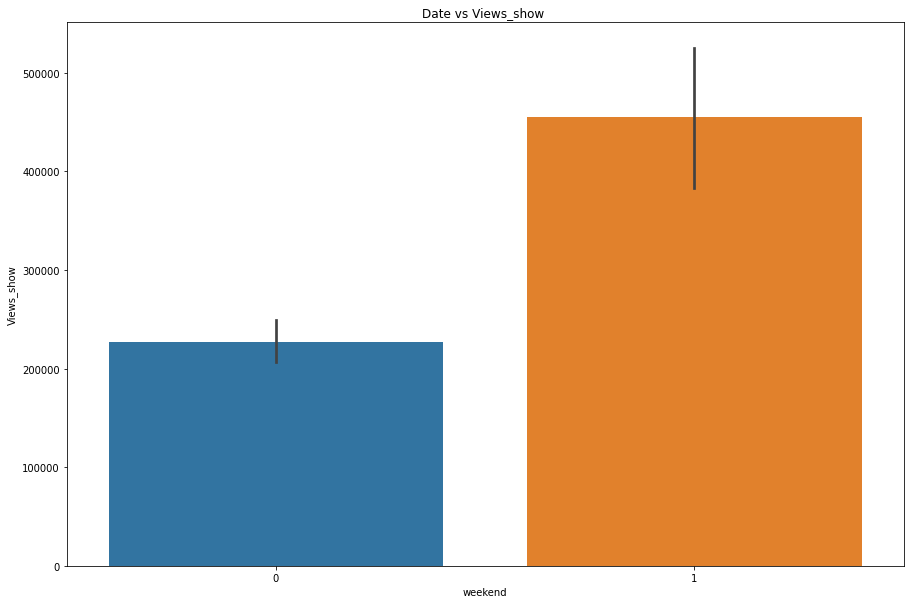

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x='weekend', y='Views_show', data=media)
plt.title('Date vs Views_show ')

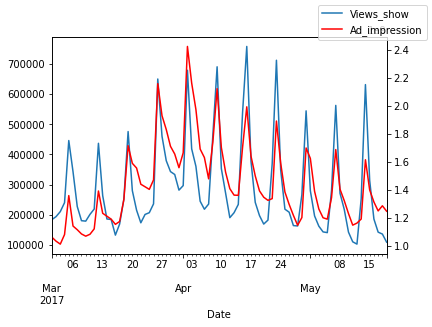

In [24]:
# plot for Date vs Views_show and days vs Ad_impressions
ax = media.plot(x="Date", y="Views_show", legend=False)
ax2 = ax.twinx()
media.plot(x="Date", y="Ad_impression", ax=ax2, legend=False, color="r")
ax.figure.legend()

# Visualizing Continuous column with scatter plot

<AxesSubplot:xlabel='Ad_impression', ylabel='Views_show'>

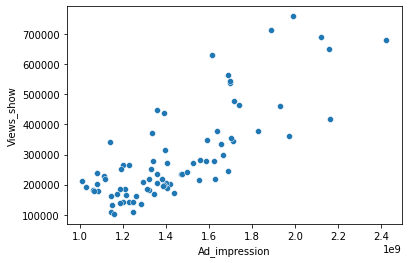

In [25]:
#Ad_impression
sns.scatterplot(data = media, x = 'Ad_impression', y = 'Views_show')

In [26]:
# we can see that the views as well as ad impressions show a weekly pattern

<AxesSubplot:xlabel='Visitors', ylabel='Views_show'>

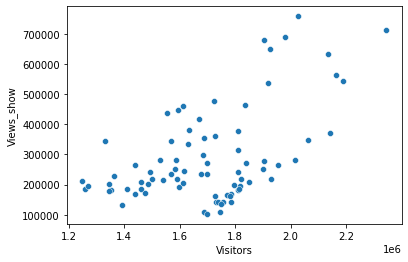

In [27]:
#Visitors
sns.scatterplot(data = media, x = 'Visitors', y = 'Views_show')

In [28]:
#Show views are some what proportionately related to Visitors

<AxesSubplot:xlabel='Views_platform', ylabel='Views_show'>

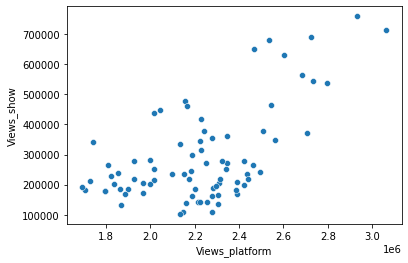

In [29]:
#Views Platform
sns.scatterplot(data = media, x = 'Views_platform', y = 'Views_show')

In [30]:
#Show views are some what proportionately related to Platform views

<AxesSubplot:xlabel='Cricket_match_india', ylabel='Views_show'>

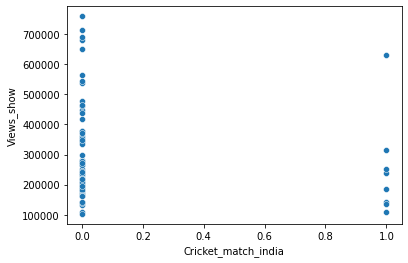

In [31]:
##Cricket Match
sns.scatterplot(data = media,x='Cricket_match_india', y='Views_show')

In [32]:
#Show views slightly declines when there is a cricket match.

<AxesSubplot:xlabel='Character_A', ylabel='Views_show'>

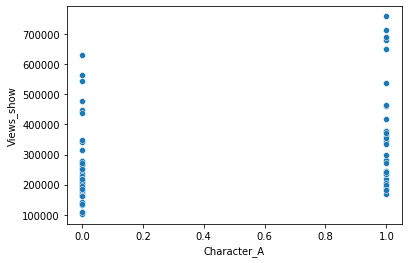

In [33]:
#Character A
sns.scatterplot(data = media,x='Character_A', y='Views_show')

In [34]:
#Presence of Character A improves the show viewership.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

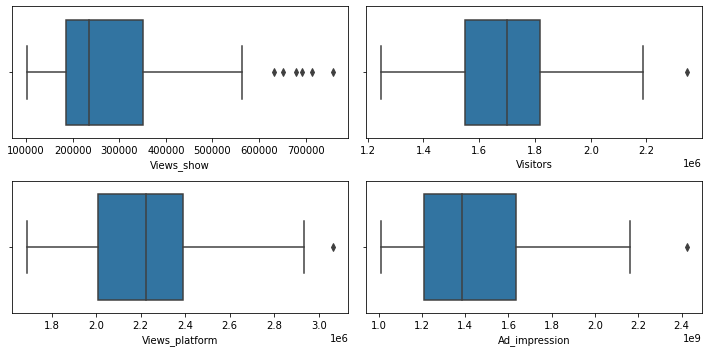

In [35]:
# Outlier Analysis
fig, axs = plt.subplots(2,2,figsize = (10,5))
plt1 = sns.boxplot(media['Views_show'], ax = axs[0,0])
plt2 = sns.boxplot(media['Visitors'], ax = axs[0,1])
plt3 = sns.boxplot(media['Views_platform'], ax = axs[1,0])
plt4 = sns.boxplot(media['Ad_impression'], ax = axs[1,1])

plt.tight_layout()

Heat map

Let's check the correlation coefficients to see which variables are highly correlated

<AxesSubplot:>

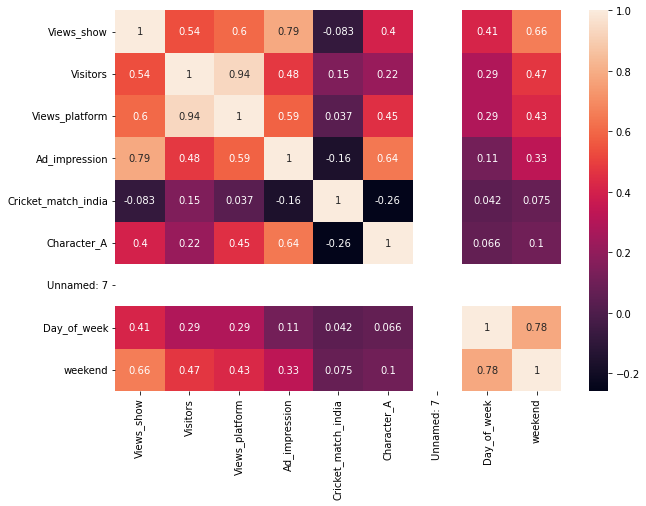

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(media.corr(), annot = True)

Lighter the clr more co-relaton

Weekend's having high co-relation where as cricket_match_one is having low co-relaton

#  Model Building

Splitting the dataset to train and test data

In [37]:
X = media[['weekend','Character_A','Ad_impression']]
y = media['Views_show']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [39]:
X_train.shape

(64, 3)

In [40]:
X_test.shape

(16, 3)

In [41]:
y_train.shape

(64,)

In [42]:
 y_test.shape

(16,)

In [43]:
linreg = LinearRegression()

In [44]:
# fit the model to the training data
linreg.fit(X_train, y_train)

LinearRegression()

In [45]:
##Predicton
pred = linreg.predict(X_test)

In [46]:
# Coefficient of the model
print(linreg.coef_)

[ 1.51450851e+05 -1.93300720e+04  3.69939829e-04]


In [47]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y,X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.05e-26
Time:                        02:33:54   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

Create a scatterplot of the real test values versus the predicted values. 

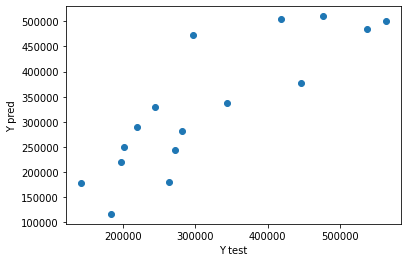

In [48]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

#  Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [49]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

MAE: 58009.078665751586
MSE: 4970215235.518728
RMSE: 70499.7534429641


# Residuals 

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Views_show', ylabel='Density'>

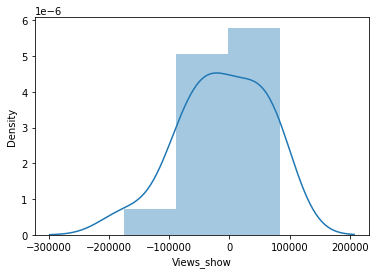

In [50]:
sns.distplot((y_test-pred))

# CONCLUSION

Ad Impressions and Character A as the driver variables that could explain the viewership pattern.

Based on industry experience, ad impressions are directly proportional to the marketing budget. 

Thus, by increasing the marketing budget, a better viewership could be achieved. Similarly,

Character A’s absence and presence created a significant change in show viewership.

Character A’s presence brings viewers to the show. Thus, these two variables could be acted upon to improve show viewership.